In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
# Ignoring Car_Name

final_df = df.drop(labels='Car_Name',axis=1)
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
# Make a column of car age

final_df['Age'] = 2020 - final_df['Year']
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [8]:
# Drop Year Column

final_df.drop('Year', axis=1, inplace=True)

final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [9]:
# Exploring unique values columns

print(final_df['Fuel_Type'].unique())
print(final_df['Seller_Type'].unique())
print(final_df['Transmission'].unique())
print(final_df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [10]:
# <<--- Encode Categorical Variables -->>

final_df = pd.get_dummies(data=final_df, drop_first=True)

final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


## Pair Plot

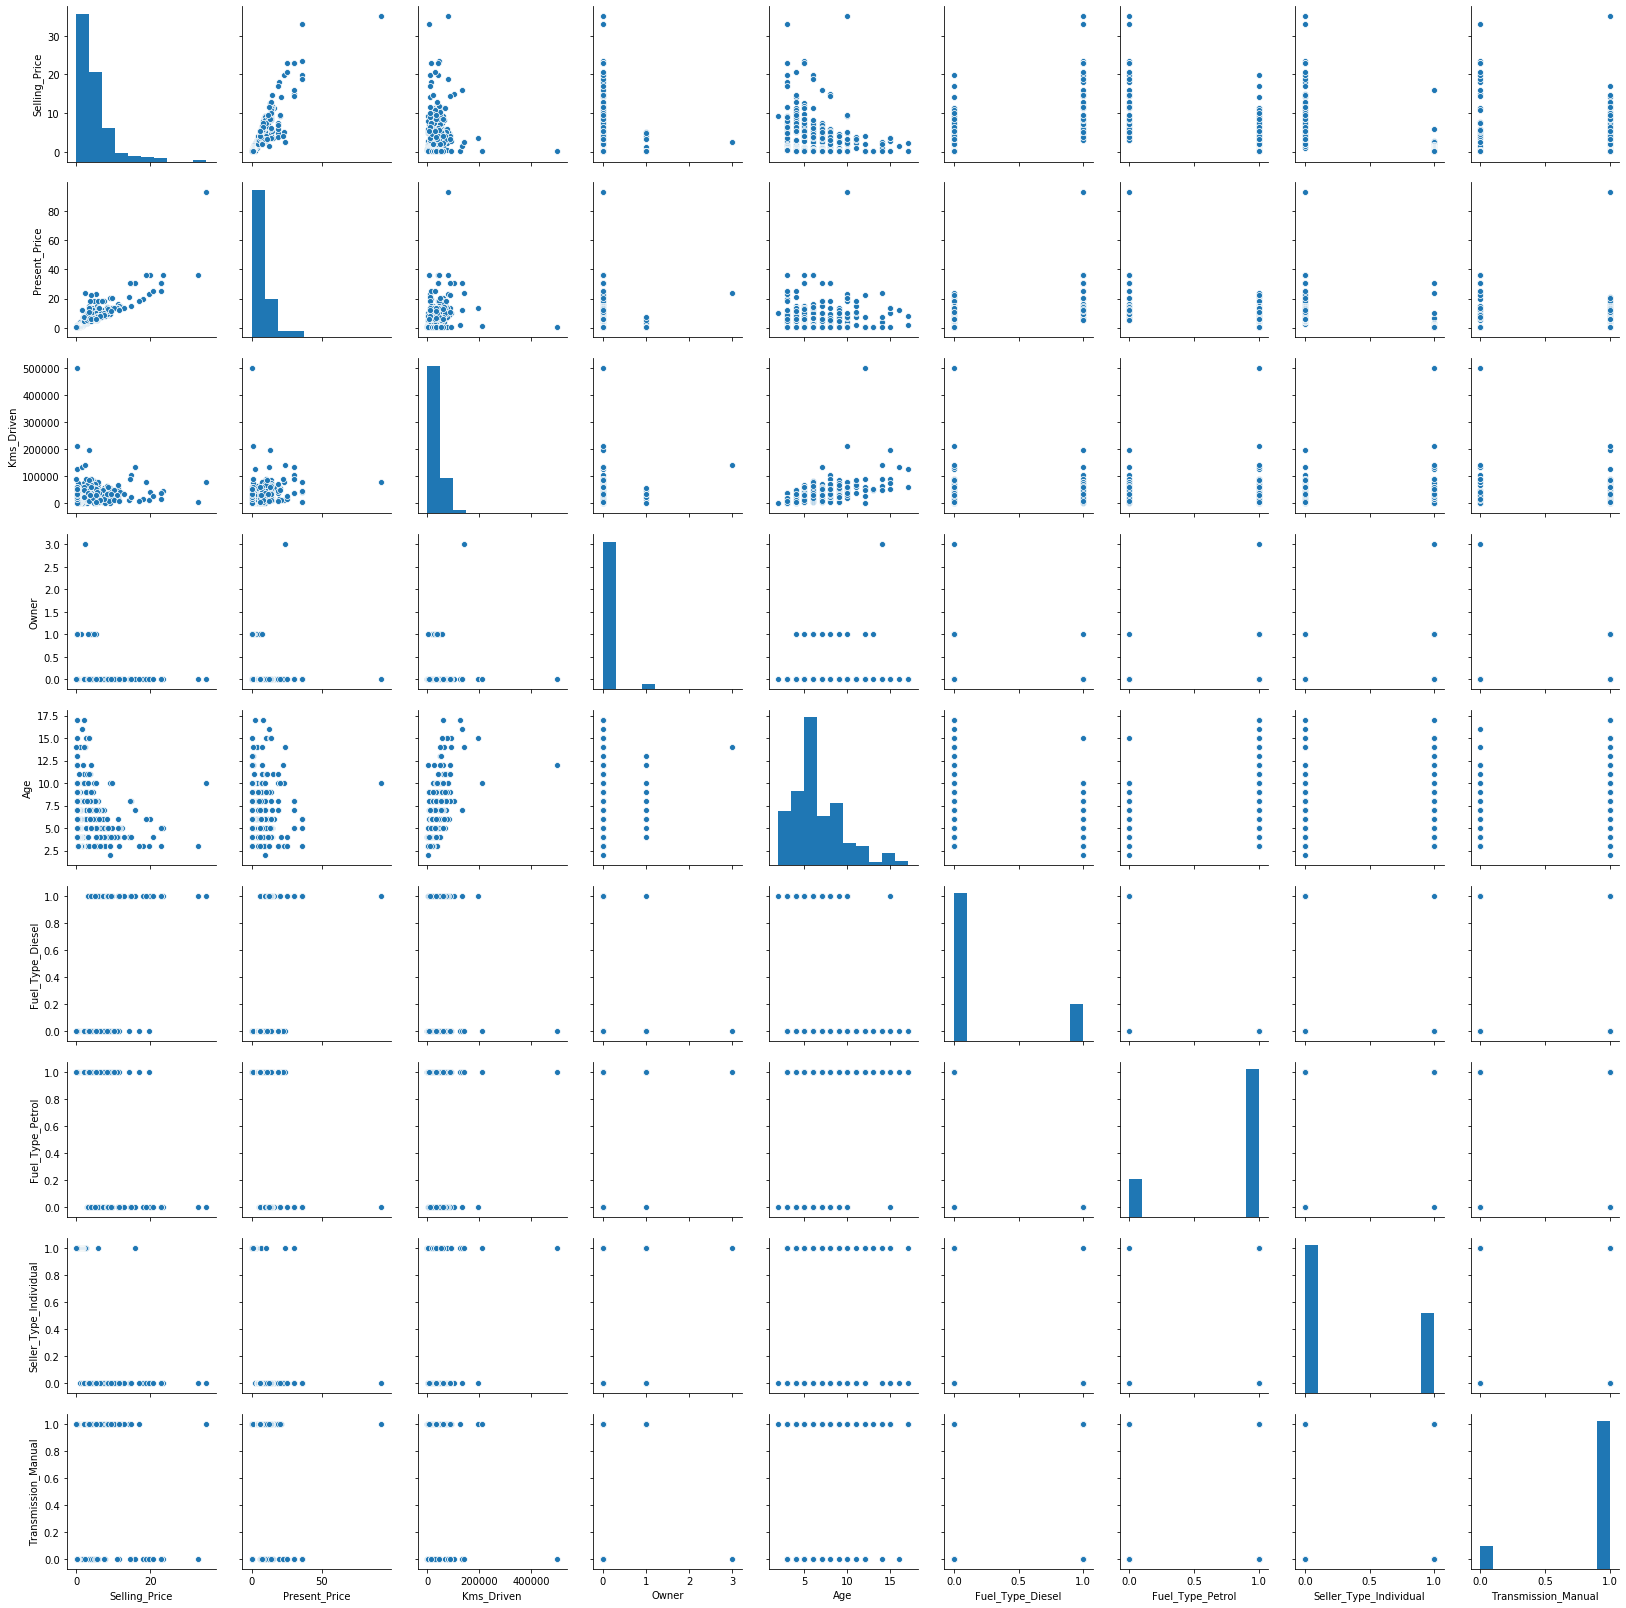

In [11]:
# <<--- Pair plot -->>

sns.pairplot(final_df)

## Correlation Matrix

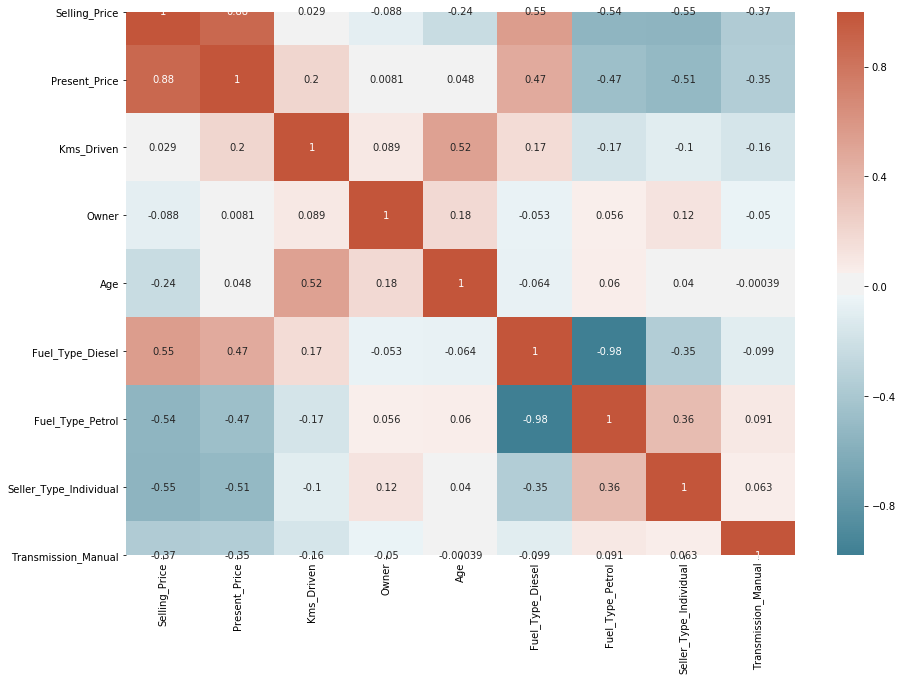

In [12]:
# <<<-- Correlation Matrix -->>>

corr = final_df.corr()

plt.subplots(figsize=(15,10))

sns.heatmap(corr, xticklabels=corr.columns,
                yticklabels=corr.columns, annot=True,
                cmap=sns.diverging_palette(220, 20, as_cmap=True))

### Form above pearson correlation matrix we see that, 'Fuel_Type_Petrol' and 'Fuel_Type_Diesel' are highly correlated and it is no surprice as they are same type of variable we have just One Hot encoded them. But you see that Present price is also very highly correlated to Selling price, that means that Present Price is very good predictor of Selling Price.

## Check for Outliars

Skewness of G1:  2.493422417797524


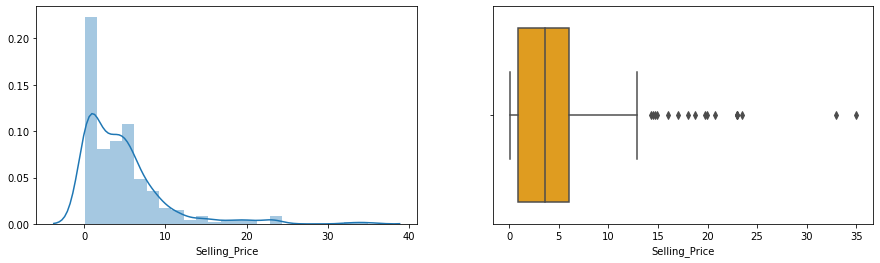

In [13]:
# <<<---- Check for outliars in Selling price ---->>>

fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.distplot(a=final_df['Selling_Price'], kde=True, ax=ax[0], axlabel='Selling_Price')

sns.boxplot(x=final_df['Selling_Price'], color='orange', ax=ax[1]) 

print(f'Skewness of G1: ', pd.Series(final_df['Selling_Price']).skew())  # skewness for selling price

In [14]:
filter_mask = (final_df['Selling_Price'] > 30)
final_df[filter_mask]

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
64,33.0,36.23,6000,0,3,1,0,0,0
86,35.0,92.60,78000,0,10,1,0,0,1


In [15]:
# Remove the cars having Selling_Price greater than 30

final_df = final_df[~(final_df['Selling_Price'] > 30)]

## Interaction Term

In [16]:
"""
As we know that diesel cars driven more are sold at low price in compare to petrol cars (holding model of car constant).
So we will Check if there is any interaction between Kilometers Driven and Diesel Cars.
"""

final_df['km_with_diesel'] = final_df['Kms_Driven'] * final_df['Fuel_Type_Diesel']

final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,km_with_diesel
0,3.35,5.59,27000,0,6,0,1,0,1,0
1,4.75,9.54,43000,0,7,1,0,0,1,43000
2,7.25,9.85,6900,0,3,0,1,0,1,0
3,2.85,4.15,5200,0,9,0,1,0,1,0
4,4.60,6.87,42450,0,6,1,0,0,1,42450


## Divide data set into dependent and independent variables.

In [17]:
X = final_df.iloc[:, 1:].values
Y = final_df['Selling_Price'].values

## Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, test_size=0.25)

## Scale Data

In [19]:
# <<-- Scale Selling Price, Present Price, Kms_Driven and Age -->>

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(x_train[:, :3])
x_train[:, :3] = ss.transform(x_train[:, :3])
x_test[:, :3] = ss.transform(x_test[:, :3])

## F-Test

In [20]:
# <<--- Aplly F-test for selecting Significant features. --->>

In [21]:
from sklearn.feature_selection import f_regression

f_score, p_value = f_regression(X=x_train, y=y_train)

In [22]:
# Check the significance of each feature by setting a level of significance of 0.05

p_value < 0.05

array([ True, False, False,  True,  True,  True,  True,  True,  True])

## NOTE :-

### You see 'Kms_Driven' and 'Owner' seems to be insignificant, and we have seen this from the correlation matrix that 'Kms_Driven' and 'Owner' explains very less of dependent variable ie. 'Selling Price'. And you also see that our interaction term is also very significant.

### Therefore we will drop features -> 'Kms_Driven' and 'Owner'

In [23]:
# <<-- Drop 'Kms_Driven' and 'Owner' ie. at index 1 and 2 respectively -->>

x_train = x_train[:, [0, 3, 4, 5, 6, 7, 8]]
x_test = x_test[:, [0, 3, 4, 5, 6, 7, 8]]

# Making Models

## 1. Multiple Linear Regression

In [24]:
from statsmodels.regression.linear_model import OLS

ols = OLS(endog=y_train, exog=x_train)
regressor1 = ols.fit()

print(regressor1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              475.3
Date:                Wed, 26 Aug 2020   Prob (F-statistic):                   7.89e-128
Time:                        15:02:39   Log-Likelihood:                         -421.72
No. Observations:                 224   AIC:                                      857.4
Df Residuals:                     217   BIC:                                      881.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [25]:
from sklearn.linear_model import LinearRegression

regressor1 = LinearRegression()
regressor1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
r_square = regressor1.score(x_train, y_train)
print('R Square: ', r_square)

R Square:  0.8878914698033437


In [27]:
# <<<--- K fold cross validation --->>>

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor1, scoring='r2', X = x_train, y = y_train, cv = 10)  # arguments are self explanatory

print("Average R Square: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average R Square: 83.07 %
Standard Deviation: 10.47 %


## 2. Ridge Regression

In [28]:
from sklearn.linear_model import Ridge

regressor2 = Ridge()
regressor2.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
# <<--- K fold cross validation --->>

accuracies = cross_val_score(estimator = regressor2, scoring='r2', X = x_train, y = y_train, cv = 10)  # arguments are self explanatory

print("Average R Square: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average R Square: 83.21 %
Standard Deviation: 10.34 %


In [30]:
# <<-- Check the best Ridge Regression Model by parameter tuning -->>

from sklearn.model_selection import GridSearchCV

parameters = [{'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

grid_search = GridSearchCV(estimator = regressor2,
                           param_grid = parameters,
                           scoring = 'r2', 
                           cv = 10,
                           n_jobs = 1)

grid_search = grid_search.fit(x_train, y_train)

best_accuracy = grid_search.best_score_   
best_parameters = grid_search.best_params_  

print("Best R Square: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best R Square: 83.34 %
Best Parameters: {'alpha': 4}


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## 3. Lasso Regression

In [31]:
from sklearn.linear_model import Lasso

regressor3 = Lasso()
regressor3.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
# <<--- K fold cross validation --->>

accuracies = cross_val_score(estimator = regressor3, scoring='r2', X = x_train, y = y_train, cv = 10)  # arguments are self explanatory

print("Average R Square: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average R Square: 74.30 %
Standard Deviation: 5.85 %


In [33]:
# <<-- Check the best Lasso Regression Model by parameter tuning -->>

from sklearn.model_selection import GridSearchCV

parameters = [{'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

grid_search = GridSearchCV(estimator = regressor3,
                           param_grid = parameters,
                           scoring = 'r2', 
                           cv = 10,
                           n_jobs = 1)

grid_search = grid_search.fit(x_train, y_train)

best_accuracy = grid_search.best_score_   
best_parameters = grid_search.best_params_  

print("Best R Square: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best R Square: 74.32 %
Best Parameters: {'alpha': 1}


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## 4. ElasticNet Regression

In [34]:
from sklearn.linear_model import ElasticNet

regressor4 = ElasticNet()
regressor4.fit(x_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
# <<--- K fold cross validation --->>

accuracies = cross_val_score(estimator = regressor4, scoring='r2', X = x_train, y = y_train, cv = 10)  # arguments are self explanatory

print("Average R Square: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average R Square: 65.81 %
Standard Deviation: 9.14 %


In [36]:
# <<-- Check the best ElasticNet Regression Model by parameter tuning -->>

from sklearn.model_selection import GridSearchCV

parameters = [{'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

grid_search = GridSearchCV(estimator = regressor4,
                           param_grid = parameters,
                           scoring = 'r2', 
                           cv = 10,
                           n_jobs = 1)

grid_search = grid_search.fit(x_train, y_train)

best_accuracy = grid_search.best_score_   
best_parameters = grid_search.best_params_  

print("Best R Square: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best R Square: 65.84 %
Best Parameters: {'alpha': 1}


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## 5. Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor

regressor5 = RandomForestRegressor()
regressor5.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [38]:
# <<--- K fold cross validation --->> Before Parameter Tuning

accuracies = cross_val_score(estimator = regressor5, scoring='r2', X = x_train, y = y_train, cv = 10)  # arguments are self explanatory

print("Average R Square: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average R Square: 92.77 %
Standard Deviation: 9.12 %


In [39]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

In [40]:
# Create the random grid

parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

In [41]:
# <<-- Check the best Lasso Regression Model by parameter tuning -->>

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator = regressor5,
                           param_distributions  = parameters,
                           scoring = 'r2', 
                           cv = 10,
                           n_jobs=1)

random_search = random_search.fit(x_train, y_train)

best_accuracy = random_search.best_score_   
best_parameters = random_search.best_params_  

print("Best R Square: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best R Square: 94.46 %
Best Parameters: {'n_estimators': 1100, 'max_features': 'auto', 'max_depth': 10}


In [42]:
# Make new Random Forest model with best parameters

regressor5 = RandomForestRegressor(n_estimators=700, max_features='sqrt', max_depth=10)
regressor5.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=700,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [43]:
# <<--- K fold cross validation --->> After Prameter Tuning

accuracies = cross_val_score(estimator = regressor5, scoring='r2', X = x_train, y = y_train, cv = 10)  # arguments are self explanatory

print("Average R Square: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average R Square: 91.73 %
Standard Deviation: 5.89 %


### Random forest regressor gives us the best results.

In [44]:
# Predict test set values

predicted_values = regressor5.predict(x_test)

In [45]:
compare_results_df = pd.DataFrame(data=zip(y_test, predicted_values), columns=['Real Values', 'Predicted Values'])
compare_results_df.head()

,Real Values,Predicted Values
0,5.50,6.293067
1,8.55,10.367170
2,5.95,7.126530
3,2.90,3.163720
4,0.50,0.508346


In [46]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('MAE:', mean_absolute_error(y_test, predicted_values))
print('MSE:', mean_squared_error(y_test, predicted_values))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predicted_values)))

MAE: 0.6249075700905593
MSE: 1.108802796214507
RMSE: 1.052997054228789


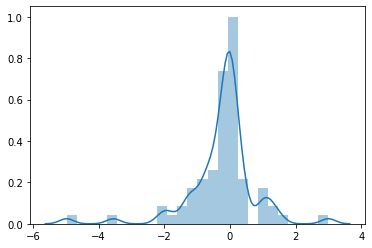

In [47]:
sns.distplot(y_test-predicted_values)

### You see above data is normally distributed that tell us that it is a good prediction.

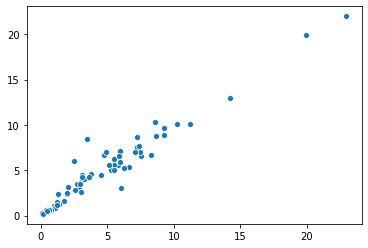

In [48]:
sns.scatterplot(y_test, predicted_values)

### Scatter plot also shows that data is linear, which also means that we got good predictions.

# Save Model

In [49]:
import pickle

with open('Model.txt','wb') as f:
    pickle.dump(regressor5, f)